## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

Thu Aug 15 15:24:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 300.7 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

## Install YOLOv



In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RxjMaqUe8Fnc1uxRlyLa")
project = rf.workspace("baru-4").project("he-dan-median-1")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.77, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to HE-dan-median-1-2 in yolov8:: 100%|██████████| 8574/8574 [00:01<00:00, 5260.61it/s]


In [ ]:
#import os

# Define the path to the data.yaml file
#data_yaml_path = "/kaggle/working/Males-&-Females-5/data.yaml"

# Read the content of the data.yaml file
#with open(data_yaml_path, "r") as file:
#    data_yaml_content = file.read()

# Update the paths in the content
#updated_content = data_yaml_content.replace("train: ", "train: ../").replace("val: ", "val: ../")

# Write the updated content back to the data.yaml file
#with open(data_yaml_path, "w") as file:
 #   file.write(updated_content)


In [ ]:
import os
import shutil

# Define the source and destination paths
source_dir = '/content/face-detection-2/valid/images/images'
destination_dir = '/content/face-detection-2/valid/images'

# Check if the source directory exists
if not os.path.exists(source_dir):
    print(f"The source directory {source_dir} does not exist.")
else:
    # List all files in the source directory
    files = os.listdir(source_dir)
    print(f"Files in the source directory before moving: {files}")

    # Move each file to the destination directory
    for file_name in files:
        full_file_name = os.path.join(source_dir, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, destination_dir)

    # Verify if the files are moved
    remaining_files = os.listdir(source_dir)
    moved_files = os.listdir(destination_dir)

    print(f"Files remaining in the source directory after moving: {remaining_files}")
    print(f"Files in the destination directory: {moved_files}")


Files in the source directory before moving: ['Mask2_mov-53_jpg.rf.859bd2464e78eac7be5b47e63d8dcf4b.jpg', 'mask-wearing-1632937711552_png_jpg.rf.b84da7d79e6f8a9284a50af105b41336.jpg', 'roboflow-44_jpg.rf.227328e39ecafb9aaeb2f5638c64a6e1.jpg', '15-08608-001_jpg.rf.0905e7f7e75b9aa6262357c9e7f4be24.jpg', 'mask_mov-10_jpg.rf.522ad74f9b15e7dcc7cae18a67282a83.jpg', '20221109_164420_jpg.rf.a045a765a21766599ad6013fe18c69c4.jpg', 'PXL_20210930_151854592_jpg.rf.d72ca4430e0e378f8af7c4c8d5bbba16.jpg', 'youtube-86_jpg.rf.bfb309a097cd51fda27e8449643e8f2c.jpg', 'IMG_5491_mp4-3_jpg.rf.ed12ace148558c4a4621a474b08b63a9.jpg', 'Screen-Recording-2021-12-09-at-1_03_04-PM_mov-36_jpg.rf.d057a8d79c09822a9aaba925cbede6ea.jpg', 'youtube-46_jpg.rf.7e40d79625c4f571af183239f0559596.jpg', 'gravitate-faces_mp4-30_jpg.rf.01de2f20dc36b641218e6bc17767c1b2.jpg', '1125506397_15801322206131n_jpg.rf.9ef52afdeb57ca43db498140ad8fbb70.jpg', 'mask-wearing-1632937520400_png_jpg.rf.4fa7555df5f7e57ef612da7e6a05136b.jpg', 'mask-wea

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/HE-dan-median-1-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

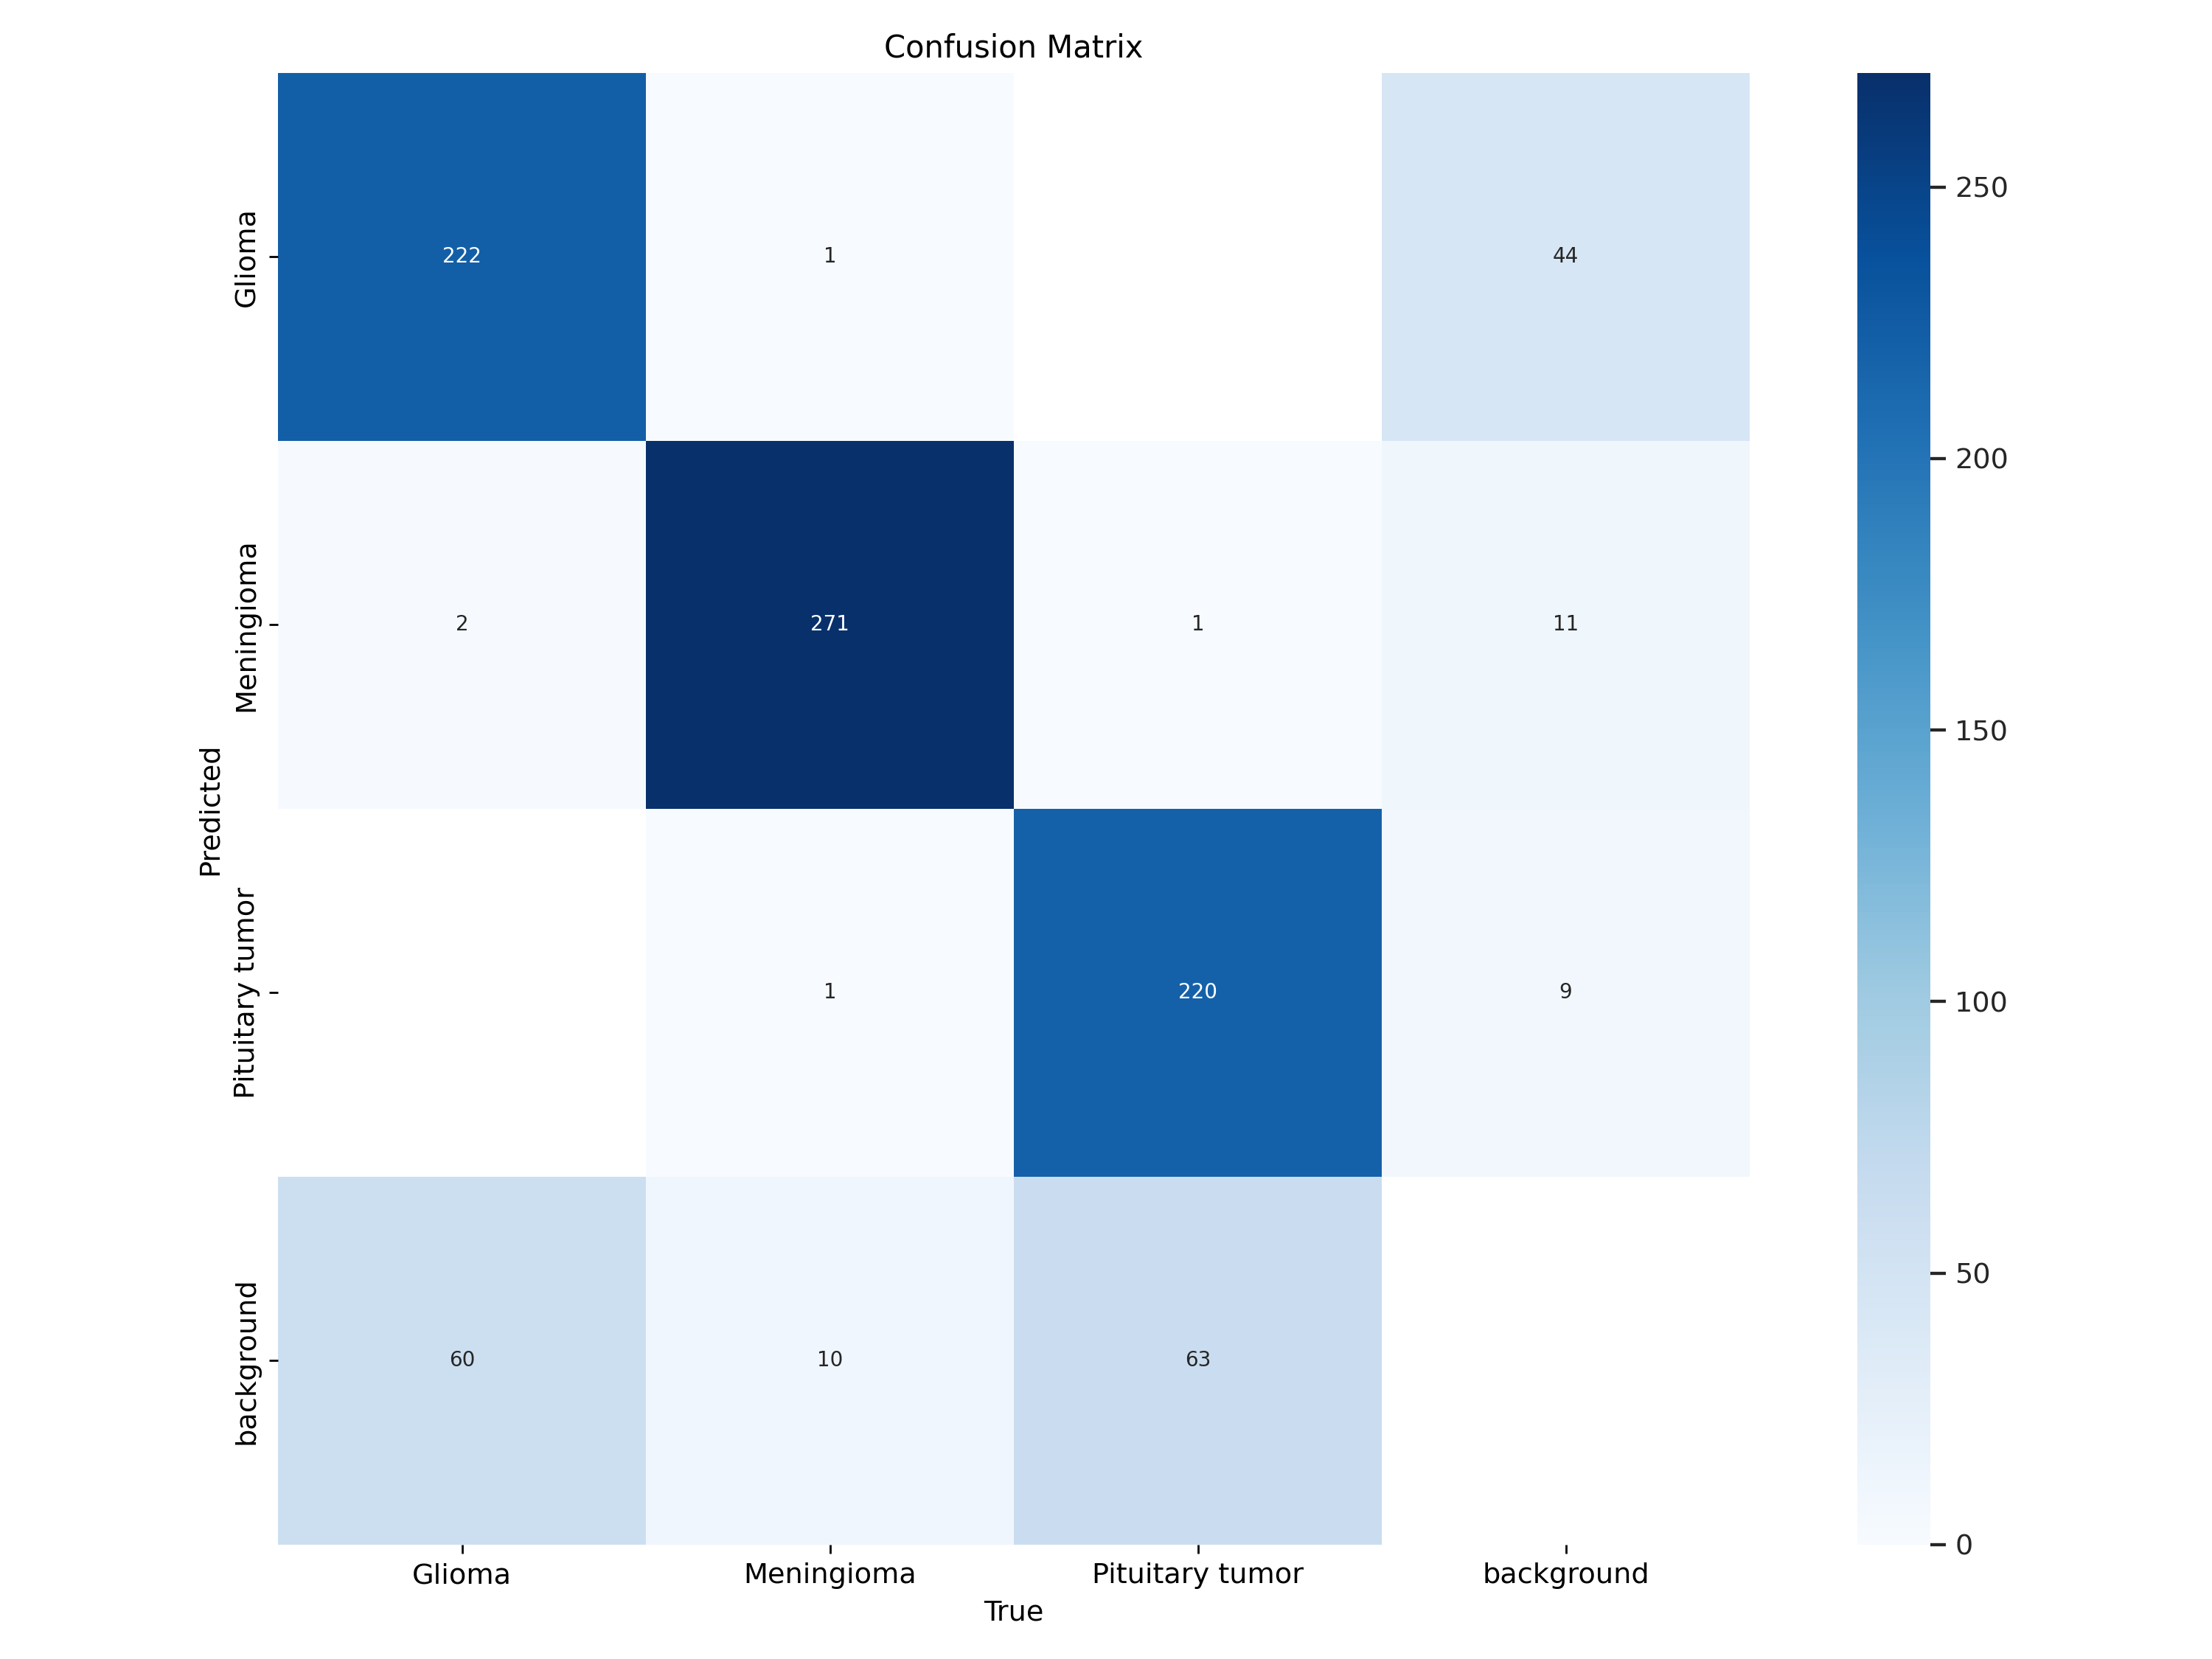

In [ ]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

In [ ]:
!yolo task=detect mode=train model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 batch=16

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train2/weights/best.pt, data=/content/HE-dan-median-1-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

In [ ]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train3/confusion_matrix.png', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train3/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml conf=0.5

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/HE-dan-median-1-2/valid/labels.cache... 851 images, 0 backgrounds, 0 corrupt: 100% 851/851 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 54/54 [00:17<00:00,  3.06it/s]
                   all        851        851      0.865      0.769      0.839      0.604
                Glioma        284        284      0.791      0.665       0.75      0.476
            Meningioma        283        283       0.94      0.943       0.96      0.787
       Pituitary tumor        284        284      0.865      0.697      0.806      0.547
Speed: 0.9ms preprocess, 13.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/428 /content/HE-dan-median-1-2/test/images/1002_png.rf.ac6271676f1aed486e3c2d909082d9aa.jpg: 800x800 1 Pituitary tumor, 22.5ms
image 2/428 /content/HE-dan-median-1-2/test/images/1024_png.rf.f0ede1bcb90be1c9c384d965e6149609.jpg: 800x800 1 Pituitary tumor, 22.5ms
image 3/428 /content/HE-dan-median-1-2/test/images/1046_png.rf.df2790fcd01f46dfc806d04d43868f58.jpg: 800x800 1 Pituitary tumor, 22.4ms
image 4/428 /content/HE-dan-median-1-2/test/images/1048_png.rf.49516d99bd8bb77c8440fc9f4f13934f.jpg: 800x800 1 Pituitary tumor, 22.5ms
image 5/428 /content/HE-dan-median-1-2/test/images/1054_png.rf.cdbdf48ae9dedbf3a5f1e1da642a3e03.jpg: 800x800 1 Pituitary tumor, 22.5ms
image 6/428 /content/HE-dan-median-1-2/test/images/1070_png.rf.ffc47f4d17ef452c6d5ccf1a1e4657f5.jpg: 800x800 1 Pituitary tumor, 22.5ms
image 7/428 /conten

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Export the model to TFLite format
model.export(format='tflite') # creates 'yolov8n_float32.tflite'

# Load the exported TFLite model
tflite_model = YOLO('yolov8n_float32.tflite')

# Run inference
results = tflite_model('https://ultralytics.com/images/bus.jpg')

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/runs/detect/train2/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 7, 13125) (21.5 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 193.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 221.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 208

100%|██████████| 1.11M/1.11M [00:00<00:00, 31.1MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 30.30file/s]



ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: slimming with onnxslim 0.1.32...
ONNX: export success ✅ 3.8s, saved as '/content/runs/detect/train2/weights/best.onnx' (42.9 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 53.1s, saved as '/content/runs/detect/train2/weights/best_saved_model' (107.2 MB)

TensorFlow Lite: starting export with tensorflow 2.17.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/runs/detect/train2/weights/best_saved_model/best_float32.tflite' (42.8 MB)

Export complete (58.7s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train2/weights/best_saved_model/best_float32.tflite imgsz=800  
Validate:        yolo val task=detect model=/content/runs/detect/train2/weights/best_saved_model/best_float32.tflite imgsz=800 data=/content/HE-dan-median-1-2/data.yaml  
Visualize:       https://netron.app


FileNotFoundError: 'yolov8n_float32.tflite' does not exist